In [1]:
import numpy as np

In [2]:
np.__version__

'1.14.1'

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import skimage

In [5]:
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

In [6]:
import skimage.io as io

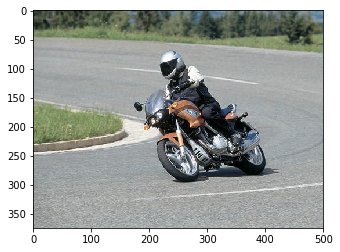

In [7]:
img = io.imread("moto.jpg")
img = img_as_float(img)
plt.imshow(img)

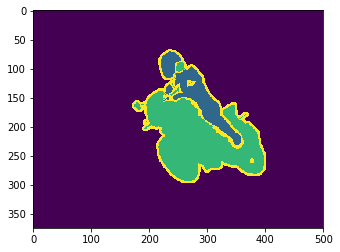

In [8]:
seg_orig = io.imread("moto_seg.png")
_, true_seg = np.unique(seg_orig.reshape(-1, 3), axis=0, return_inverse=True)
true_seg = true_seg.reshape(seg_orig.shape[:2])
plt.imshow(true_seg)

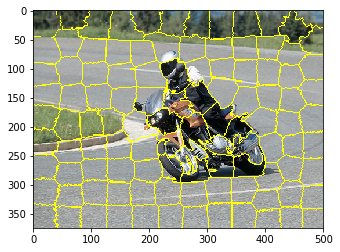

In [9]:
superpixels = slic(img, slic_zero=True)
plt.imshow(mark_boundaries(img, superpixels))

# Naive Superpixel clustering

In [11]:
M = np.stack([
    img[superpixels == i].mean(axis=0)
    for i in np.unique(superpixels)
])
M.shape

(108, 3)

In [10]:
from sklearn.cluster import DBSCAN

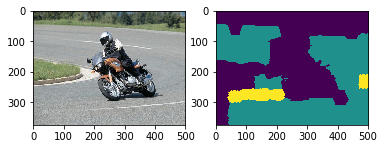

In [12]:
clusts = DBSCAN(eps=0.01).fit_predict(M)
segments = clusts[superpixels]

_, (left, right) = plt.subplots(1,2)

left.imshow(img)
right.imshow(segments)

In [13]:
clusts

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,
        0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,  1, -1,  0,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  1,  1,  1,  1, -1,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0])

# Evaluation

Following metric from Martial Hebert: https://www.cs.cmu.edu/~hebert/segs.htm

In [17]:
from sklearn.metrics import adjusted_rand_score

In [18]:
adjusted_rand_score(true_seg.flat, segments.flat)

0.042494610880530095

# Pipelining and Grid Search

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
method = Pipeline([
    ("slic", FunctionTransformer(slic, validate=False, kw_args={"slic_zero": True})),
    ("clust", DBSCAN(eps=0.01)),
])

In [21]:
method.fit(img)

Pipeline(memory=None,
     steps=[('slic', FunctionTransformer(accept_sparse=False,
          func=<function slic at 0x7f12f28278c8>, inv_kw_args=None,
          inverse_func=None, kw_args={'slic_zero': True},
          pass_y='deprecated', validate=False)), ('clust', DBSCAN(algorithm='auto', eps=0.01, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None))])

In [24]:
segments = method.predict(img)

AttributeError: 'DBSCAN' object has no attribute 'predict'